In [28]:
student_id = "2702343914" # change this with your actual student id

import hashlib
student_id_hash = int(hashlib.md5(student_id.encode('utf-8')).hexdigest(), 16)

In [29]:
location_int = student_id_hash % 3

if location_int==0:
    location = 'A'
    max_file = 60
elif location_int==1:
    location = 'B'
    max_file = 44
elif location_int==2:
    location = 'C'
    max_file = 40

In [48]:
file_id = student_id_hash % (max_file-1) + 1

In [49]:
print(f"""Please use the following files:
    * Room-Climate-Datasets/datasets-location_{location}/room_climate-location_{location}-measurement{file_id:02d}.csv
    * Room-Climate-Datasets/datasets-location_{location}/room_climate-location_{location}-measurement{file_id+1:02d}.csv
""")

Please use the following files:
    * Room-Climate-Datasets/datasets-location_A/room_climate-location_A-measurement01.csv
    * Room-Climate-Datasets/datasets-location_A/room_climate-location_A-measurement02.csv



In [32]:
dataset = 'datasets-location_A/room_climate-location_A-measurement01.csv'
datatest = 'datasets-location_A/room_climate-location_A-measurement02.csv'

In [33]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras import layers
import matplotlib.pyplot as plt

scaler = MinMaxScaler()

column_name = [
    'EID', 'AbsT', 'RelT', 'NID', 
    'Temp', 'RelH', 'L1', 'L2', 
    'Occ', 'Act', 'Door', 'Win'
]

In [34]:
dataframe = pd.read_csv(dataset, header=None, names=column_name)
dataframe

,EID,AbsT,RelT,NID,Temp,RelH,L1,L2,Occ,Act,Door,Win
0,1,1458031648545,1,1,20.48,42.332,185.71,492.2,0,0,0,0
1,2,1458031648645,1,4,20.73,39.983,214.29,657.8,0,0,0,0
2,3,1458031648795,1,3,20.48,38.687,197.14,542.8,0,0,0,0
3,4,1458031651038,3,2,20.89,40.712,174.29,552.0,0,0,0,0
4,5,1458031652010,4,4,20.73,39.983,211.43,653.2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8179,8180,1458039820785,8173,3,20.74,41.522,215.71,680.8,0,0,0,0
8180,8181,1458039822454,8174,2,21.12,43.790,188.57,602.6,0,0,0,0
8181,8182,1458039824025,8176,3,20.75,41.481,215.71,680.8,0,0,0,0
8182,8183,1458039824290,8176,4,21.13,42.615,232.86,791.2,0,0,0,0


In [35]:
input_feature = ['Temp', 'RelH', 'L1', 'L2']
X = dataframe[input_feature]
Y = dataframe['Temp'].shift(-1)

In [36]:
X = X.iloc[:-1]
Y = Y.dropna()

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [39]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                320       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
164/164 [==============================] - 0s 1ms/step - loss: 207.8651 - mae: 12.2140 - val_loss: 16.3083 - val_mae: 3.2565
Epoch 2/50
164/164 [==============================] - 0s 855us/step - loss: 11.5112 - mae: 2.5793 - val_loss: 7.1553 - val_mae: 2.1160
Epoch 3/50
164/164 [==============================] - 0s 734us/step - loss: 3.8211 - mae: 1.5283 - val_loss: 1.6040 - val_mae: 1.0400
Epoch 4/50
164/164 [==============================] - 0s 699us/step - loss: 0.7969 - mae: 0.6883 - val_loss: 0.3069 - val_mae: 0.4450
Epoch 5/50
164/164 [==============================] - 0s 697us/step - loss: 0.1591 - mae: 0.3127 - val_loss: 0.0880 - val_mae: 0.2415
Epoch 6/50
164/164 [==============================] - 0s 737us/step - loss: 0.0675 - mae: 0.2143 - val_loss: 0.0622 - val_mae: 0.2072
Epoch 7/50
164/164 [==============================] - 0s 786us/step - loss: 0.0547 - mae: 0.1967 - val_loss: 0.0526 - val_mae: 0.1964
Epoch 8/50
164/164 [==============================] - 0s 75

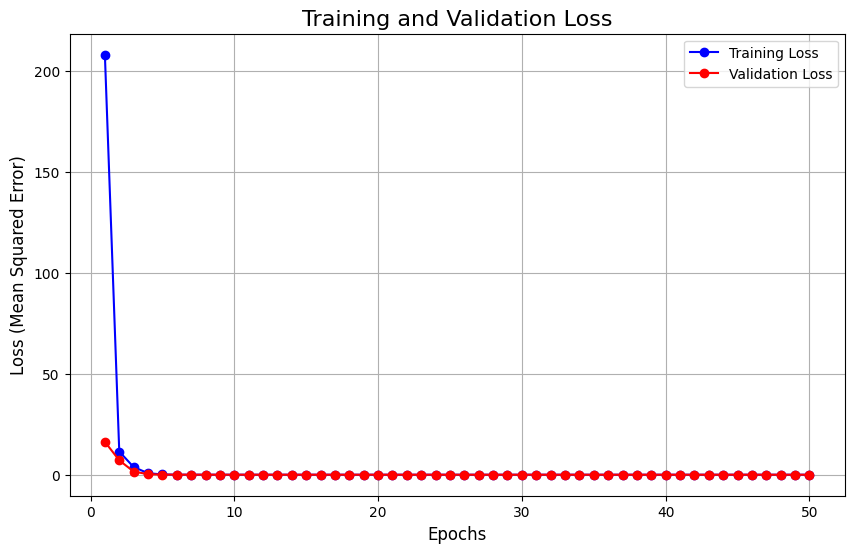

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)


plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

In [43]:
model_tuned = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='linear')
])

model_tuned.compile(optimizer='adam', 
                    loss='mean_squared_error',
                    metrics=['mae'])

model_tuned.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 2,945
Trainable params: 2,945
Non-traina

In [44]:
history_tuned = model_tuned.fit(
    x_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
164/164 [==============================] - 0s 1ms/step - loss: 193.6396 - mae: 11.6494 - val_loss: 15.0349 - val_mae: 3.0141
Epoch 2/50
164/164 [==============================] - 0s 859us/step - loss: 15.5396 - mae: 3.1557 - val_loss: 2.2880 - val_mae: 1.2372
Epoch 3/50
164/164 [==============================] - 0s 798us/step - loss: 8.5750 - mae: 2.3474 - val_loss: 0.5969 - val_mae: 0.5898
Epoch 4/50
164/164 [==============================] - 0s 796us/step - loss: 7.3595 - mae: 2.1512 - val_loss: 0.4289 - val_mae: 0.4994
Epoch 5/50
164/164 [==============================] - 0s 830us/step - loss: 6.8816 - mae: 2.1056 - val_loss: 0.2220 - val_mae: 0.3602
Epoch 6/50
164/164 [==============================] - 0s 836us/step - loss: 6.4550 - mae: 2.0232 - val_loss: 0.2761 - val_mae: 0.4339
Epoch 7/50
164/164 [==============================] - 0s 836us/step - loss: 6.0390 - mae: 1.9625 - val_loss: 0.2813 - val_mae: 0.4431
Epoch 8/50
164/164 [==============================] - 0s 80

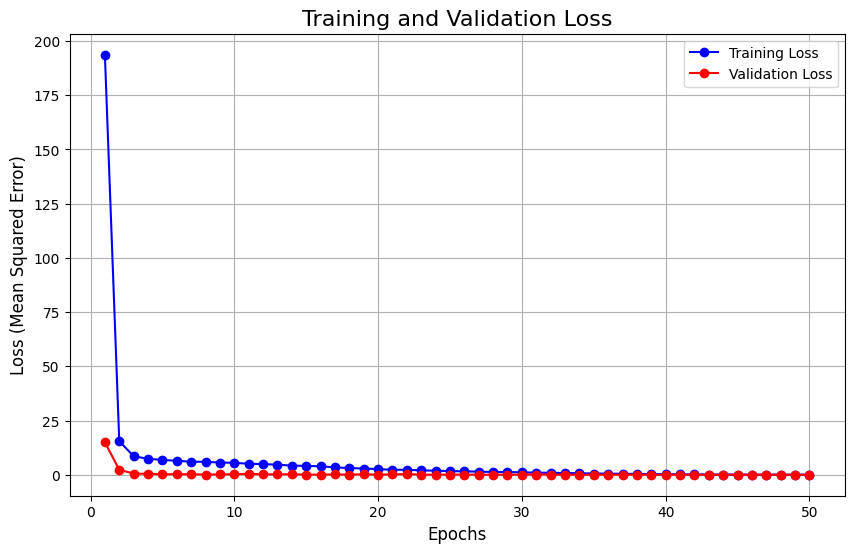

In [45]:
train_loss_tuned = history_tuned.history['loss']
val_loss_tuned = history_tuned.history['val_loss']
epochs = range(1, len(train_loss_tuned) + 1)


plt.figure(figsize=(10, 6))

plt.plot(epochs, train_loss_tuned, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss_tuned, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (Mean Squared Error)', fontsize=12)
plt.legend()
plt.grid(True)

plt.show()

In [47]:
from sklearn.metrics import classification_report

test_loss, test_mae = model_tuned.evaluate(x_test_scaled, y_test, verbose=0)

print("--- Hasil Evaluasi pada Test Set ---")
print(f"Test Loss (Mean Squared Error): {test_loss:.4f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.4f}")

--- Hasil Evaluasi pada Test Set ---
Test Loss (Mean Squared Error): 0.0387
Test Mean Absolute Error (MAE): 0.1716
